In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import callbacks
from PIL import Image
import matplotlib.pyplot as plt
import modules.images.utils as utils
import os

In [3]:
directory = "./data/cifar-100-test/train"
categories = utils.get_categories(directory)

In [4]:
# Model configuration
TRAIN_DATA_DIR = 'data/cifar-100-test/train'
TEST_DATA_DIR = 'data/cifar-100-test/test'
TRAIN_IMAGE_SIZE = 32
TRAIN_BATCH_SIZE = 25
batch_size = 25
img_width, img_height, img_num_channels = 32, 32, 3
no_classes = 10
no_epochs = 25
validation_split = 0.3
verbosity = 1

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [5]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=validation_split)

train_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='training')
 
validation_generator = image_data_generator.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 3500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
dense_15 (Dense)             (None, 32, 32, 32)        2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
dense_16 (Dense)             (None, 32, 32, 16)        528       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16384)            

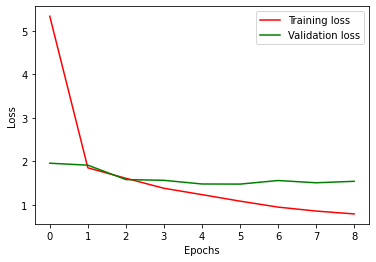

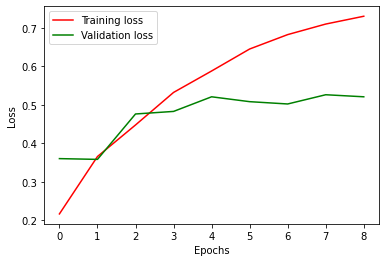

In [13]:
# Create the model
model8 = Sequential()

model8.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model8.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))

model8.add(Dense(16, activation='relu'))
model8.add(Dropout(0.4))

model8.add(Dense(8, activation='relu'))
model8.add(Dropout(0.4))

model8.add(Flatten())
model8.add(Dense(2, activation='softmax'))

model8.summary()

model8 = utils.compile_model(model8)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

training = utils.train_model(model8, no_epochs + 10, train_generator, validation_generator, my_callbacks)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

# Model 9: amélioration du model 8 apres l'ajout des jeux de données

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dense_72 (Dense)             (None, 8, 8, 32)          2080      
_________________________________________________________________
dropout_27 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
dense_73 (Dense)             (None, 2, 2, 16)        

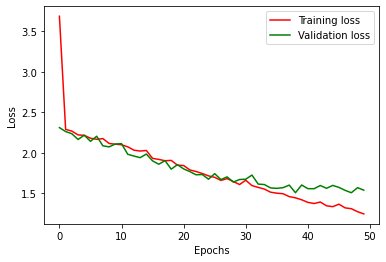

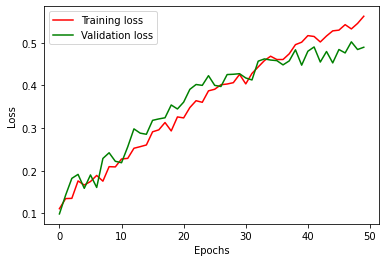

In [32]:
# Create the model
model11 = Sequential()

model11.add(Conv2D(64, kernel_size=5, activation='relu', padding='same', input_shape=(img_width, img_height, img_num_channels)))
model11.add(MaxPooling2D(pool_size=(4, 4)))
model11.add(Dense(32, activation='relu'))
model11.add(Dropout(0.2))

model11.add(Conv2D(32, kernel_size=5, activation='relu', padding='same'))
model11.add(MaxPooling2D(pool_size=(4, 4)))
model11.add(Dense(16, activation='relu'))
model11.add(Dropout(0.2))

model11.add(Flatten())
model11.add(Dense(no_classes, activation='softmax'))

model11.summary()

model11 = utils.compile_model(model11)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2)
]

training = utils.train_model(model11, no_epochs + no_epochs, train_generator, validation_generator)

utils.loss_visualisation(training.history['loss'], training.history['val_loss'])
utils.loss_visualisation(training.history['accuracy'], training.history['val_accuracy'])

# Test des models

In [8]:
test_image = "data/cifar-100-test/test/apple/0014.png"

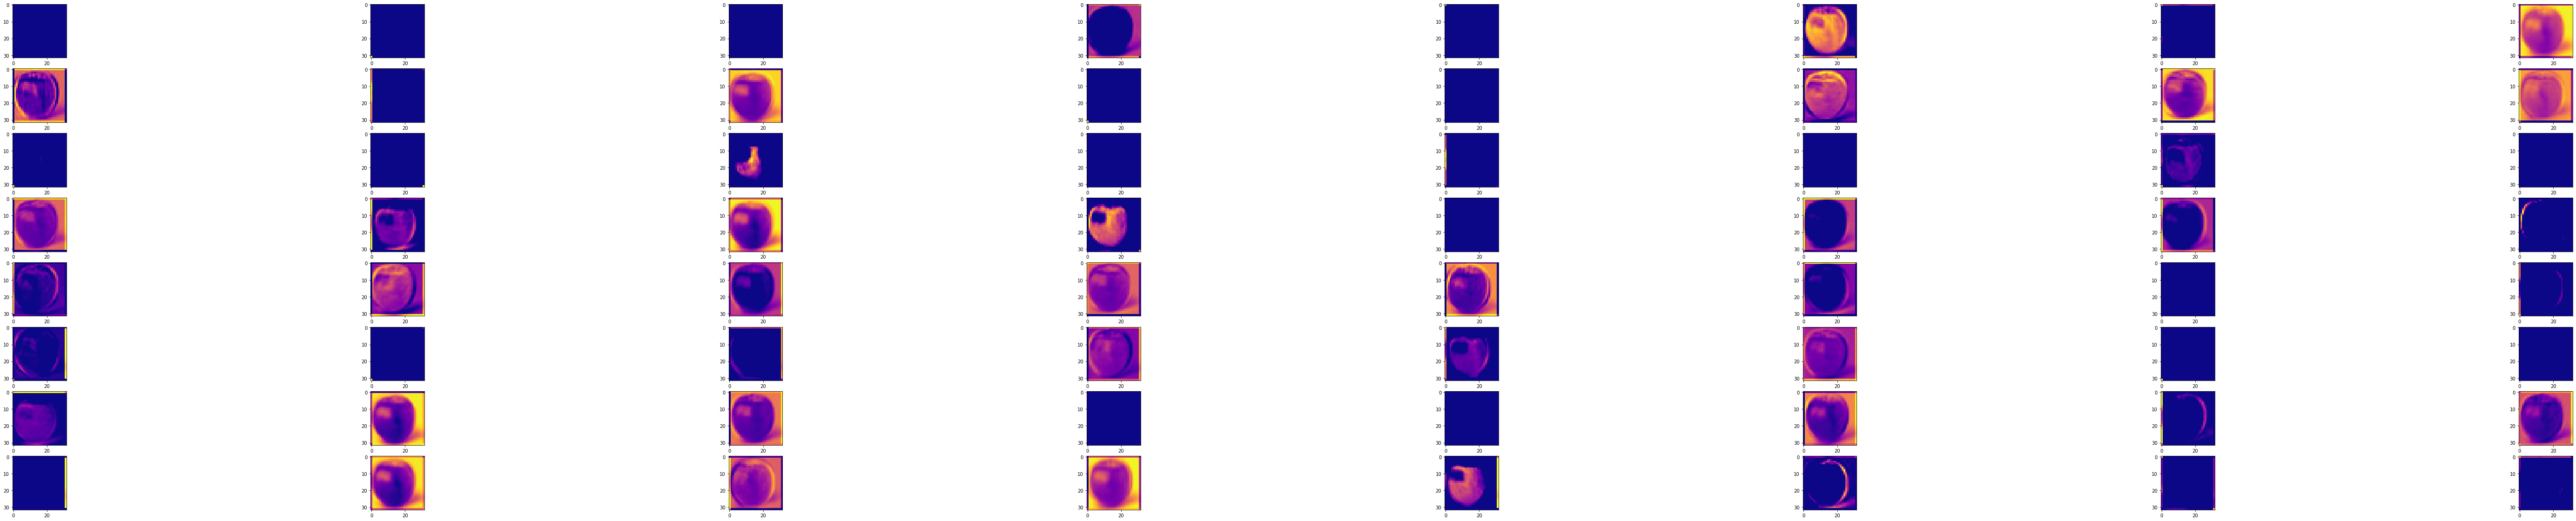

In [9]:
activations = utils.init_activation(model10, test_image)
utils.display_activation(activations, 8, 8, 0)

In [13]:
from keras.preprocessing import image
from keras.models import load_model
import pandas as pd
import seaborn as sns
import cv2 as cv
import numpy as np

def predict_image(model, choix):
    test_image = image.load_img(choix, target_size = (32, 32))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)

    preds = model.predict_classes(test_image)
    prob = model.predict_proba(test_image)

    index = preds[0]
    print(f'Categorie {categories[preds[0]]}, Prédiction {"%.2f" % (prob[0][index] * 100)}%')
    
    predictrions_array = []
    
    for x in range(0,len(categories)):
        predictrions_array.append([categories[x], prob[0][x]])
    
    df = pd.DataFrame(predictrions_array, columns = ['Category', 'Prediction'])

    f, axarr = plt.subplots(1,2, figsize=(10,4))

    img = cv.imread(choix)
    axarr[0].imshow(img)
    axarr[0].axis('off')

    axarr[1] = sns.barplot(x="Prediction", y="Category", data=df)
    sns.set_style(style='white')

    axarr[1].set_ylabel('Category')    
    axarr[1].set_xlabel('Prediction')

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    f.suptitle("Model Prediction")
    f.subplots_adjust(top=0.88)

    return df
    
    

Categorie bed, Prédiction 10.06%


,Category,Prediction
0,apple,0.099905
1,aquarium_fish,0.099771
2,baby,0.099126
3,bear,0.099740
4,beaver,0.100107
5,bed,0.100615
6,bee,0.099835
7,beetle,0.100372
8,bicycle,0.100524
9,bottle,0.100006


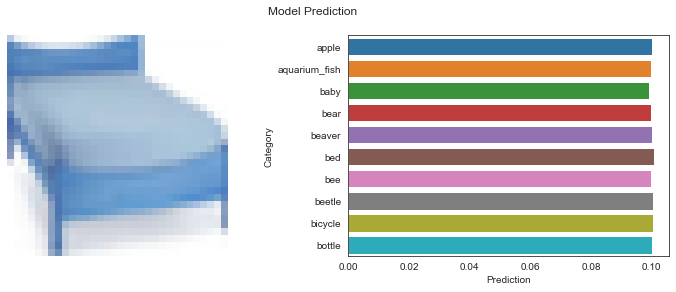

In [14]:
choix = r'data/cifar-100-test/test/bed/0005.png'
predict_image(model10, choix)